In [8]:
from src.data.get_data_coinglass import load_data_for_exchange_pair, compute_funding_performance_multi_exchange, CoinGlassAPI, calculate_performance_metrics, calculate_max_drawdown, analyze_venue_switching_strategy
%load_ext autoreload
%autoreload 2




# Example usage
api_key = "5a7e3eb1256241899a54cd41cfd38825"
start_date = "2023-01-01"
end_date = "2024-12-31"
limit = 1000
interval = "4h"

api = CoinGlassAPI(api_key)



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:

# Load BTC data (Here from Binance)


btc_data = load_data_for_exchange_pair(api, "Binance", "BTCUSDT",  "Binance", "BTCUSDT", start_date,end_date,interval,limit, True)





print(btc_data)

# Load ETH data

eth_data = load_data_for_exchange_pair(api, "Binance", "ETHUSDT",  "Binance", "ETHUSDT", start_date,end_date,interval,limit, True)



print(eth_data)


                   date   timestamp  closePrice spot_exchange spot_symbol  \
0   2024-11-14 00:00:00  1731542400    89937.02       Binance     BTCUSDT   
1   2024-11-14 04:00:00  1731556800    90769.42       Binance     BTCUSDT   
2   2024-11-14 08:00:00  1731571200    91491.86       Binance     BTCUSDT   
3   2024-11-14 12:00:00  1731585600    87947.99       Binance     BTCUSDT   
4   2024-11-14 16:00:00  1731600000    89463.99       Binance     BTCUSDT   
..                  ...         ...         ...           ...         ...   
277 2024-12-30 04:00:00  1735531200    93731.65       Binance     BTCUSDT   
278 2024-12-30 08:00:00  1735545600    93923.14       Binance     BTCUSDT   
279 2024-12-30 12:00:00  1735560000    92130.21       Binance     BTCUSDT   
280 2024-12-30 16:00:00  1735574400    94417.04       Binance     BTCUSDT   
281 2024-12-30 20:00:00  1735588800    92792.05       Binance     BTCUSDT   

     fundingRate perp_exchange perp_symbol  
0       0.010000       Binance

In [10]:
import pandas as pd

exchanges = ['Binance', 'Bybit', 'OKX']
include_list =  ['BTC', 'ETH']
exclude_list = ['XBT/USD', 'XBT/USD', 'BTC-USD', 'ETH-USD', 'BTC_USD', 'ETH_USD', 'ETH/USD'] #exclude weorg instrument, keep USDT feeds, why kraken uses XBT for BTC ticker i dunno but fuck them
ticker_map_spot = CoinGlassAPI(api_key).get_supported_tickers(include_list, exclude_list) #get tickers for spot
ticker_map_futures = CoinGlassAPI(api_key).get_supported_tickers(
    include_list, exclude_list, futures=True
) #get tickers for futures

df_ticker_spot = ticker_map_spot.rename(columns={'instrumentId': 'spotInstrumentId'})
print(df_ticker_spot)
df_ticker_spot.to_csv("ticker_map_spot.csv", index=False)
df_ticker_futures = ticker_map_futures.rename(columns={'instrumentId': 'futuresInstrumentId'})
print(df_ticker_futures)
df_ticker_futures.to_csv("ticker_map_futures.csv", index=False)

# merged_ticker_df = pd.merge(df_ticker_spot, df_ticker_futures, on=['exchange', 'baseAsset'], how='outer')

# # WIP, keep only perps tickers, remove futures tickers
# print(merged_ticker_df)
# for _, row in ticker_map.iterrows():
#     exchange = row['exchange']
#     ticker = row['instrumentId']
    
#     print(f"Ticker for {exchange}: {ticker}")
    
#     if ticker:
#         df = compute_funding_performance(
#             api_key=api_key,
#             symbol=ticker,
#             start_str=start_date,
#             end_str=end_date,
#             interval=interval,
#             limit=1000,
#             exchanges=[exchange],
#             position_size=1
#         )
#         print(df.head())





      exchange baseAsset spotInstrumentId
0      Binance       BTC          BTCUSDT
1      Binance       ETH          ETHUSDT
2     Bitfinex       BTC           BTCUSD
3     Bitfinex       ETH           ETHUSD
4        Bybit       BTC          BTCUSDT
5        Bybit       ETH          ETHUSDT
6     Coinbase       BTC         BTC-USDT
7     Coinbase       ETH         ETH-USDT
8   Crypto.com       BTC         BTC_USDT
9   Crypto.com       ETH         ETH_USDT
10      Kraken       ETH         ETH/USDT
11      Kraken       BTC         XBT/USDT
12         OKX       BTC         BTC-USDT
13         OKX       ETH         ETH-USDT
     exchange baseAsset futuresInstrumentId
0     Binance       BTC         BTCUSD_PERP
1     Binance       BTC       BTCUSD_250627
2     Binance       BTC       BTCUSD_250926
3     Binance       ETH         ETHUSD_PERP
4     Binance       ETH       ETHUSD_250627
..        ...       ...                 ...
175       OKX       ETH     ETH-USDT-250926
176       OKX     

Calculate Strategy Statistics

For the 2021 Bull Run (2020-06-29_to_2021-11-14)

Separating spot data...
BTC data saved to src/data/concat/BTC/btc_spot_data_2020-06-29_to_2021-11-13.csv
ETH data saved to src/data/concat/ETH/eth_spot_data_2020-06-29_to_2021-11-13.csv

Separating futures data...
BTC data saved to src/data/concat/BTC/btc_futures_data_2020-06-29_to_2021-11-13.csv
ETH data saved to src/data/concat/ETH/eth_futures_data_2020-06-29_to_2021-11-13.csv

Data separation complete!


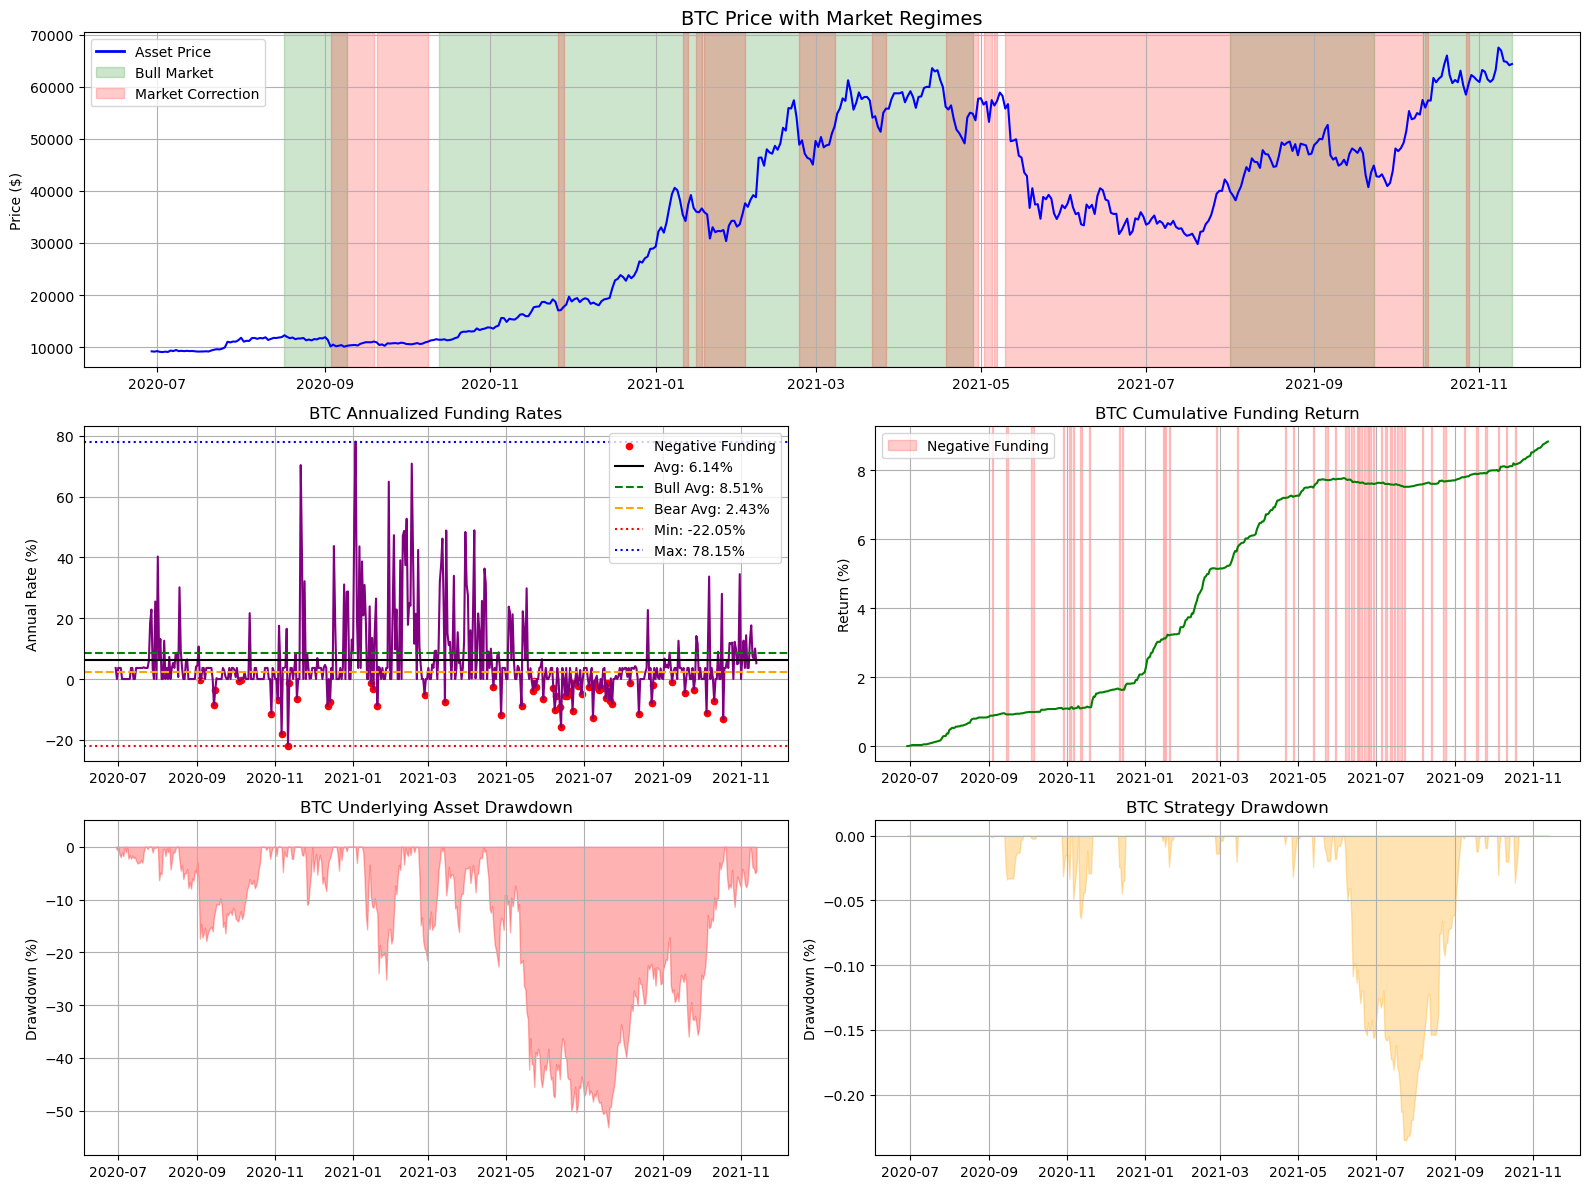

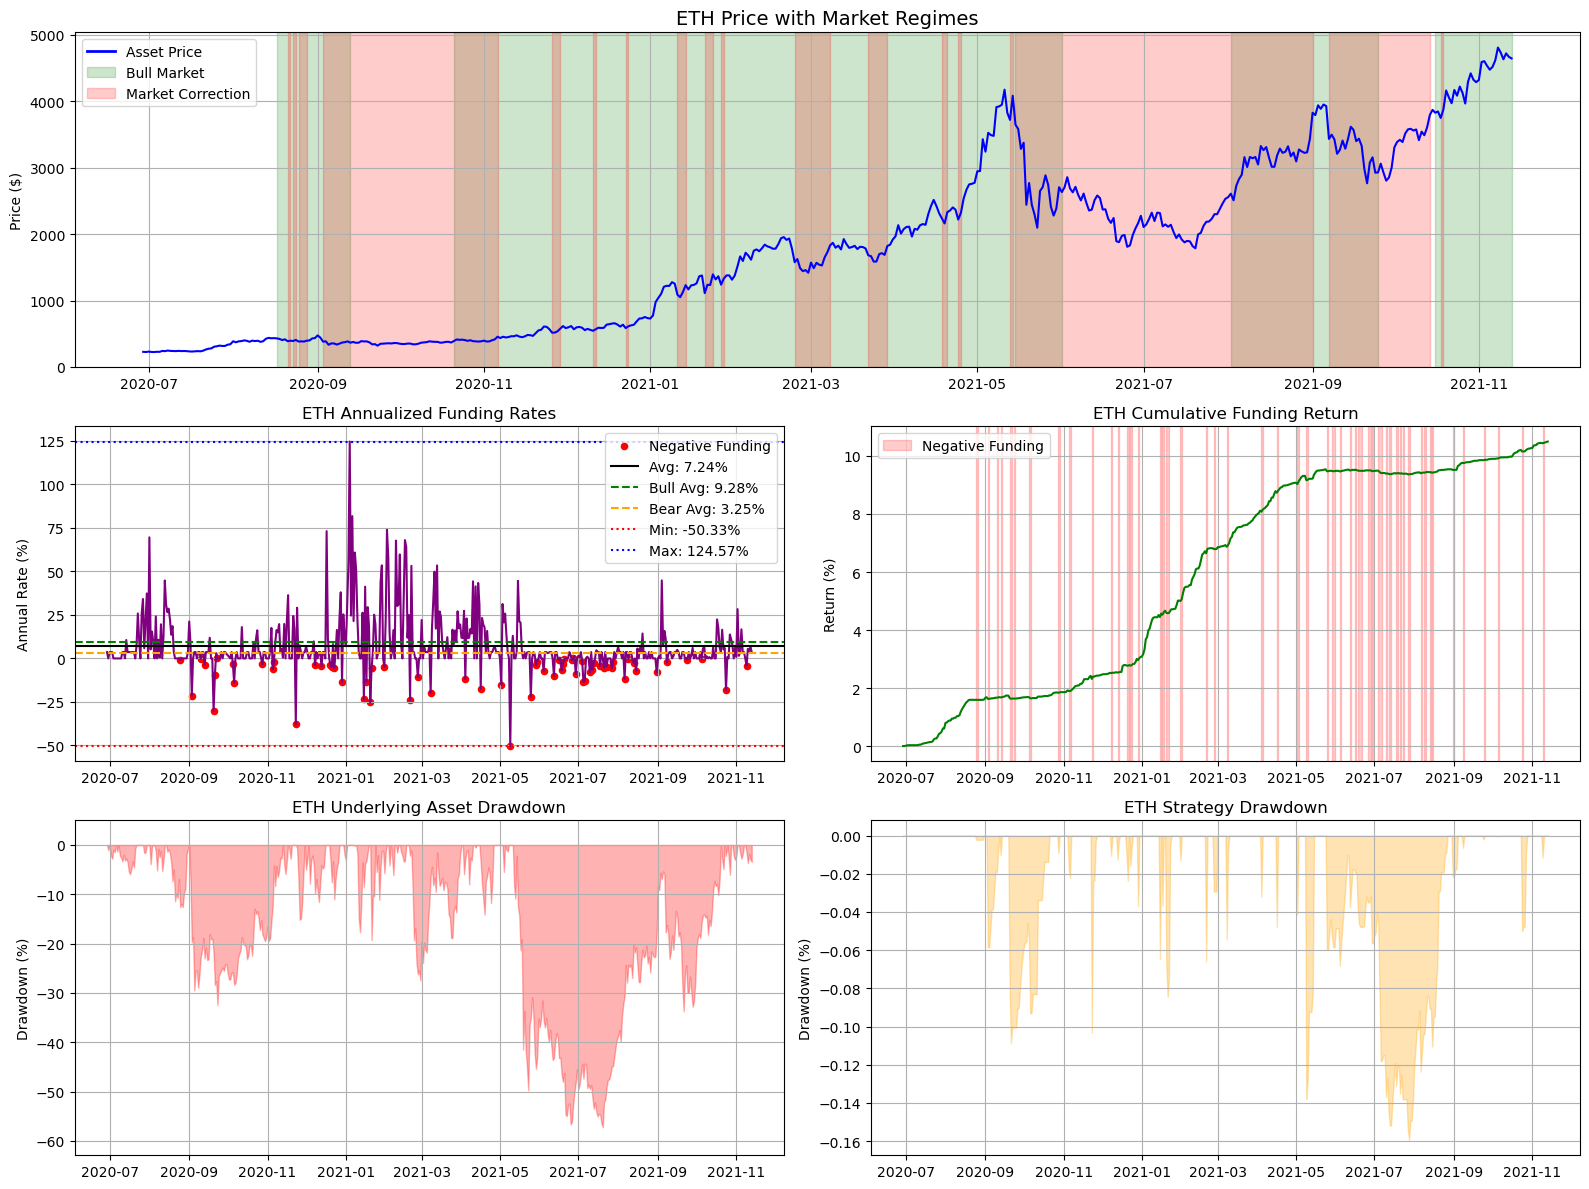

,Metric,BTC Value,ETH Value
0,Period Information,,None
1,Start Date,2020-06-29,2020-06-29
2,End Date,2021-11-13,2021-11-13
3,Total Days,502,502
4,Years,1.3753424657534246,1.3753424657534246
5,Price Information,,None
6,Entry Price,9192.56,227.93
7,Exit Price,64380.00,4644.28
8,Underlying Asset Performance,,None
9,Total Return,600.35%,1937.59%


In [11]:
from src.data.get_full_data_coinglass import load_data_for_exchange_pair,display_statistics_table, process_data_files,  compute_funding_performance_multi_exchange, CoinGlassAPI, calculate_performance_metrics,plot_carry_trade_performance,  merge_and_compute_carry_trade, calculate_period_statistics
import matplotlib.pyplot as plt
import pandas as pd



# Example usage
spot_file_path = 'data/concat/spots_data_2020-06-29_to_2021-11-14.csv'
futures_file_path = 'data/concat/futures_data_2020-06-29_to_2021-11-14.csv'

separated_data = process_data_files(spot_file_path, futures_file_path)

# Now you can use the separated data for your delta neutral strategy
# For BTC:
btc_spot_df = separated_data['btc_spot']
btc_futures_df = separated_data['btc_futures']
btc_results_df = merge_and_compute_carry_trade(btc_spot_df, btc_futures_df, merge_on='timestamp')
btc_stats = calculate_period_statistics(btc_results_df)

# For ETH:
eth_spot_df = separated_data['eth_spot']
eth_futures_df = separated_data['eth_futures']
eth_results_df = merge_and_compute_carry_trade(eth_spot_df, eth_futures_df, merge_on='timestamp')
eth_stats = calculate_period_statistics(eth_results_df)


# For BTC analysis:
btc_results_df = merge_and_compute_carry_trade(btc_spot_df, btc_futures_df, merge_on='timestamp')
btc_stats = calculate_period_statistics(btc_results_df)
plot_carry_trade_performance(btc_results_df, btc_stats, title="BTC")

# For ETH analysis:
eth_results_df = merge_and_compute_carry_trade(eth_spot_df, eth_futures_df, merge_on='timestamp')
eth_stats = calculate_period_statistics(eth_results_df)
plot_carry_trade_performance(eth_results_df, eth_stats, title="ETH")

# Display statistics in a nice table format
# For BTC only:
# btc_table = display_statistics_table(btc_stats)

# For comparison of BTC and ETH:
comparison_table = display_statistics_table(btc_stats, eth_stats)


For the Luna Collapse (2022-03-09_to_2022-06-09)

Separating spot data...
BTC data saved to src/data/concat/BTC/btc_spot_data_2022-03-09_to_2022-06-08.csv
ETH data saved to src/data/concat/ETH/eth_spot_data_2022-03-09_to_2022-06-08.csv

Separating futures data...
BTC data saved to src/data/concat/BTC/btc_futures_data_2022-03-09_to_2022-06-08.csv
ETH data saved to src/data/concat/ETH/eth_futures_data_2022-03-09_to_2022-06-08.csv

Data separation complete!


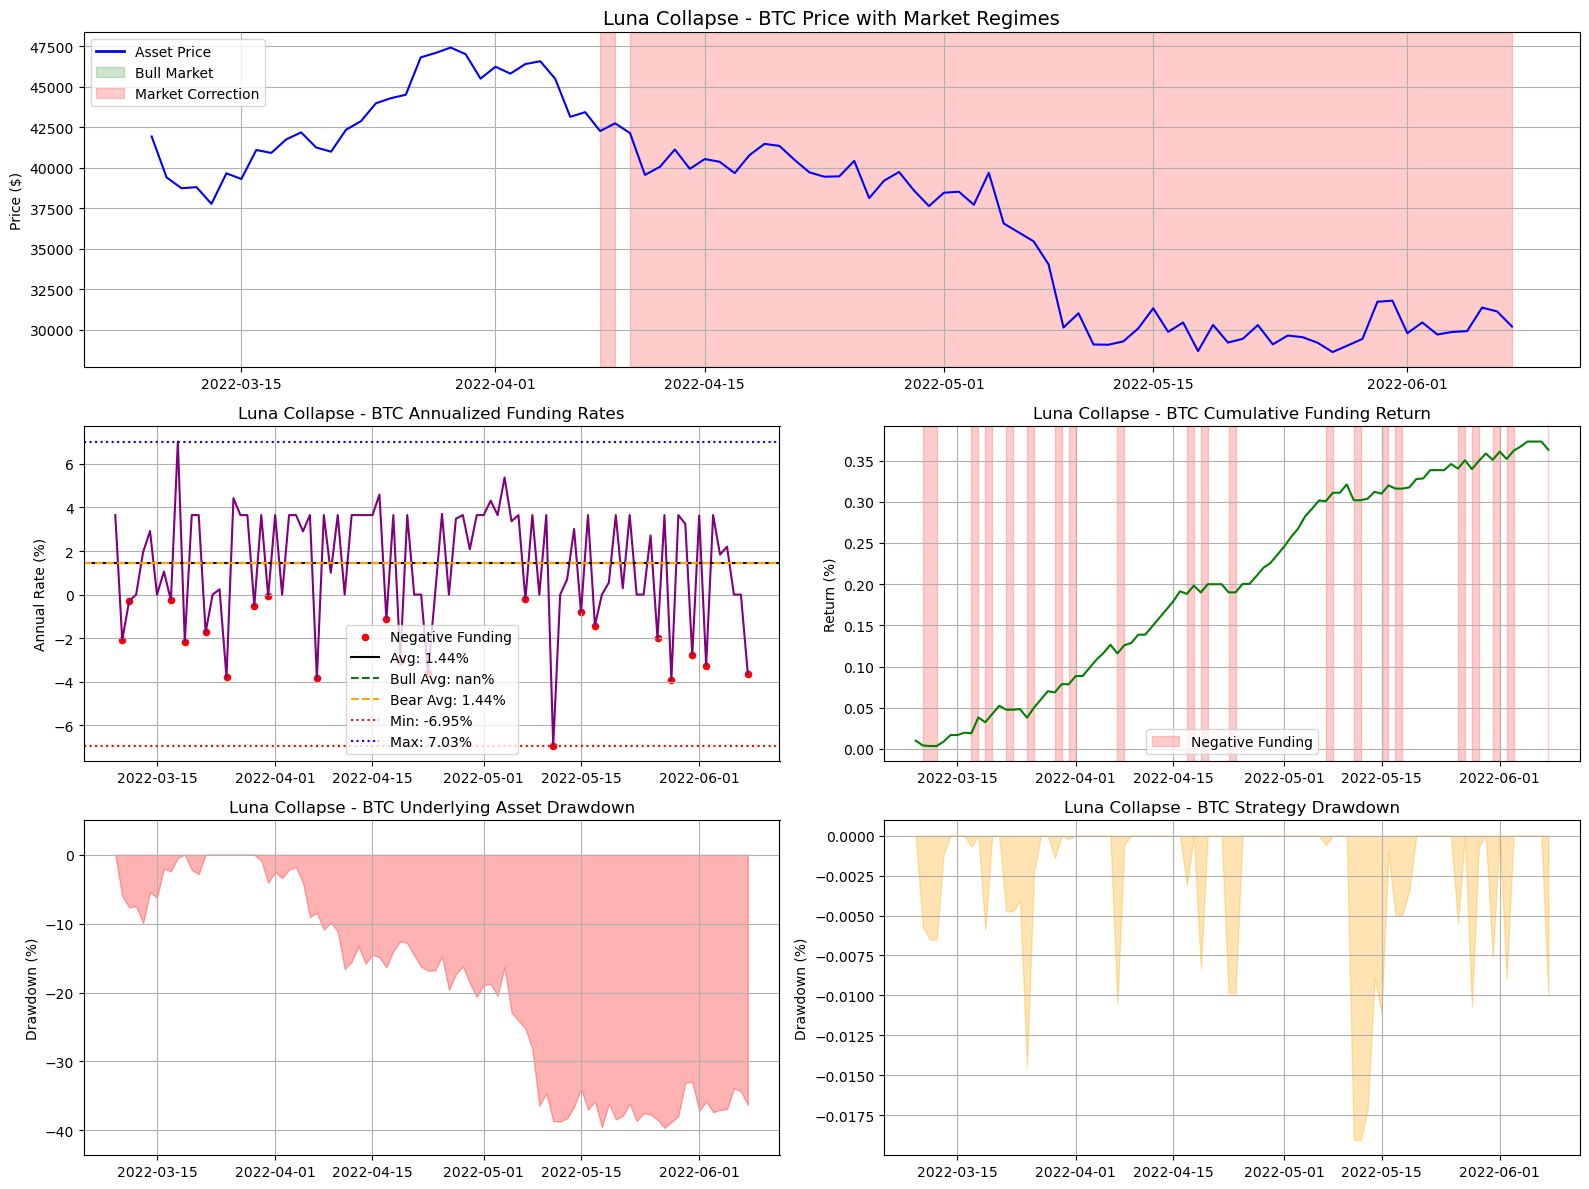

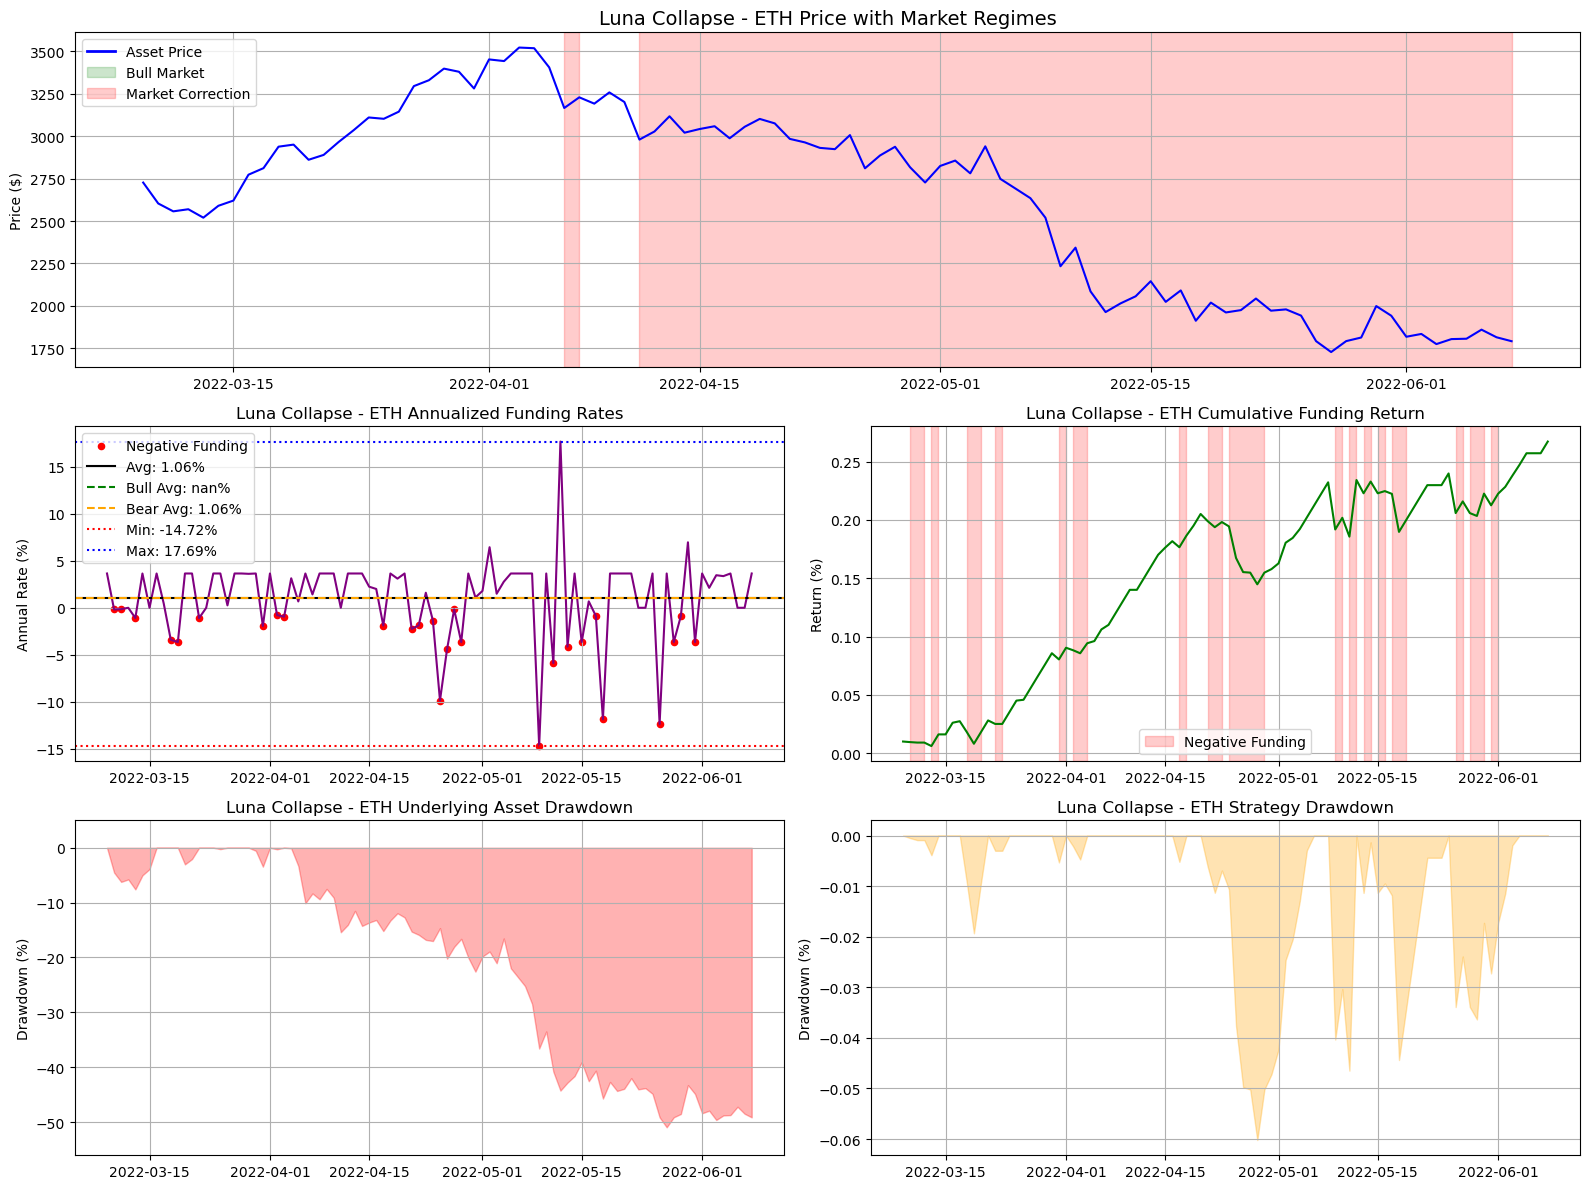

,Metric,BTC Value,ETH Value
0,Period Information,,None
1,Start Date,2022-03-09,2022-03-09
2,End Date,2022-06-08,2022-06-08
3,Total Days,91,91
4,Years,0.2493150684931507,0.2493150684931507
5,Price Information,,None
6,Entry Price,41941.71,2726.98
7,Exit Price,30202.58,1791.61
8,Underlying Asset Performance,,None
9,Total Return,-27.99%,-34.30%


In [12]:
from src.data.get_full_data_coinglass import load_data_for_exchange_pair,display_statistics_table, process_data_files,  compute_funding_performance_multi_exchange, CoinGlassAPI, calculate_performance_metrics,plot_carry_trade_performance,  merge_and_compute_carry_trade, calculate_period_statistics
import matplotlib.pyplot as plt
import pandas as pd



# Example usage
spot_file_path = 'data/concat/spots_data_2022-03-09_to_2022-06-09.csv'
futures_file_path = 'data/concat/futures_data_2022-03-09_to_2022-06-09.csv'

separated_data = process_data_files(spot_file_path, futures_file_path)

# Now you can use the separated data for your delta neutral strategy
# For BTC:
btc_spot_df = separated_data['btc_spot']
btc_futures_df = separated_data['btc_futures']
btc_results_df = merge_and_compute_carry_trade(btc_spot_df, btc_futures_df, merge_on='timestamp')
btc_stats = calculate_period_statistics(btc_results_df)

# For ETH:
eth_spot_df = separated_data['eth_spot']
eth_futures_df = separated_data['eth_futures']
eth_results_df = merge_and_compute_carry_trade(eth_spot_df, eth_futures_df, merge_on='timestamp')
eth_stats = calculate_period_statistics(eth_results_df)


# For BTC analysis:
btc_results_df = merge_and_compute_carry_trade(btc_spot_df, btc_futures_df, merge_on='timestamp')
btc_stats = calculate_period_statistics(btc_results_df)
plot_carry_trade_performance(btc_results_df, btc_stats, title="Luna Collapse - BTC")

# For ETH analysis:
eth_results_df = merge_and_compute_carry_trade(eth_spot_df, eth_futures_df, merge_on='timestamp')
eth_stats = calculate_period_statistics(eth_results_df)
plot_carry_trade_performance(eth_results_df, eth_stats, title="Luna Collapse - ETH")

# Display statistics in a nice table format
# For BTC only:
# btc_table = display_statistics_table(btc_stats)

# For comparison of BTC and ETH:
comparison_table = display_statistics_table(btc_stats, eth_stats)


For the FTX Collapse (2022-09-16_to_2022-12-16)

Separating spot data...
BTC data saved to src/data/concat/BTC/btc_spot_data_2022-09-16_to_2022-12-15.csv
ETH data saved to src/data/concat/ETH/eth_spot_data_2022-09-16_to_2022-12-15.csv

Separating futures data...
BTC data saved to src/data/concat/BTC/btc_futures_data_2022-09-16_to_2022-12-15.csv
ETH data saved to src/data/concat/ETH/eth_futures_data_2022-09-16_to_2022-12-15.csv

Data separation complete!


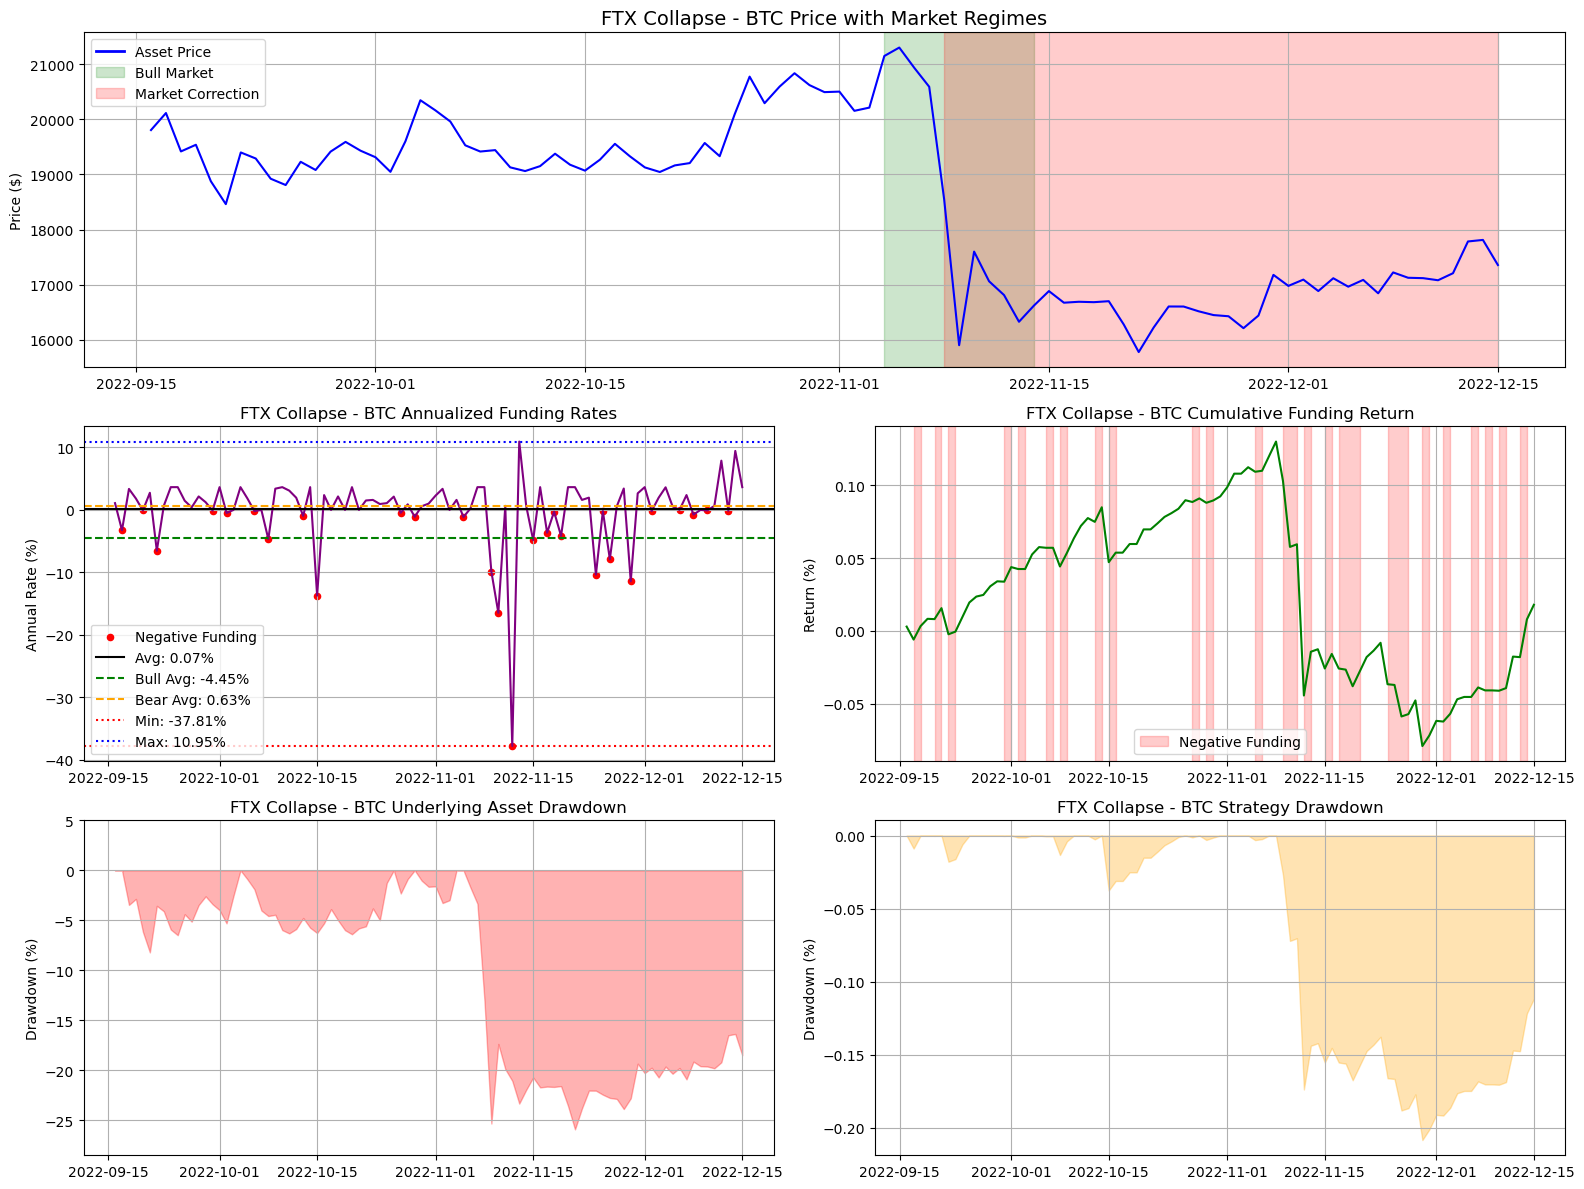

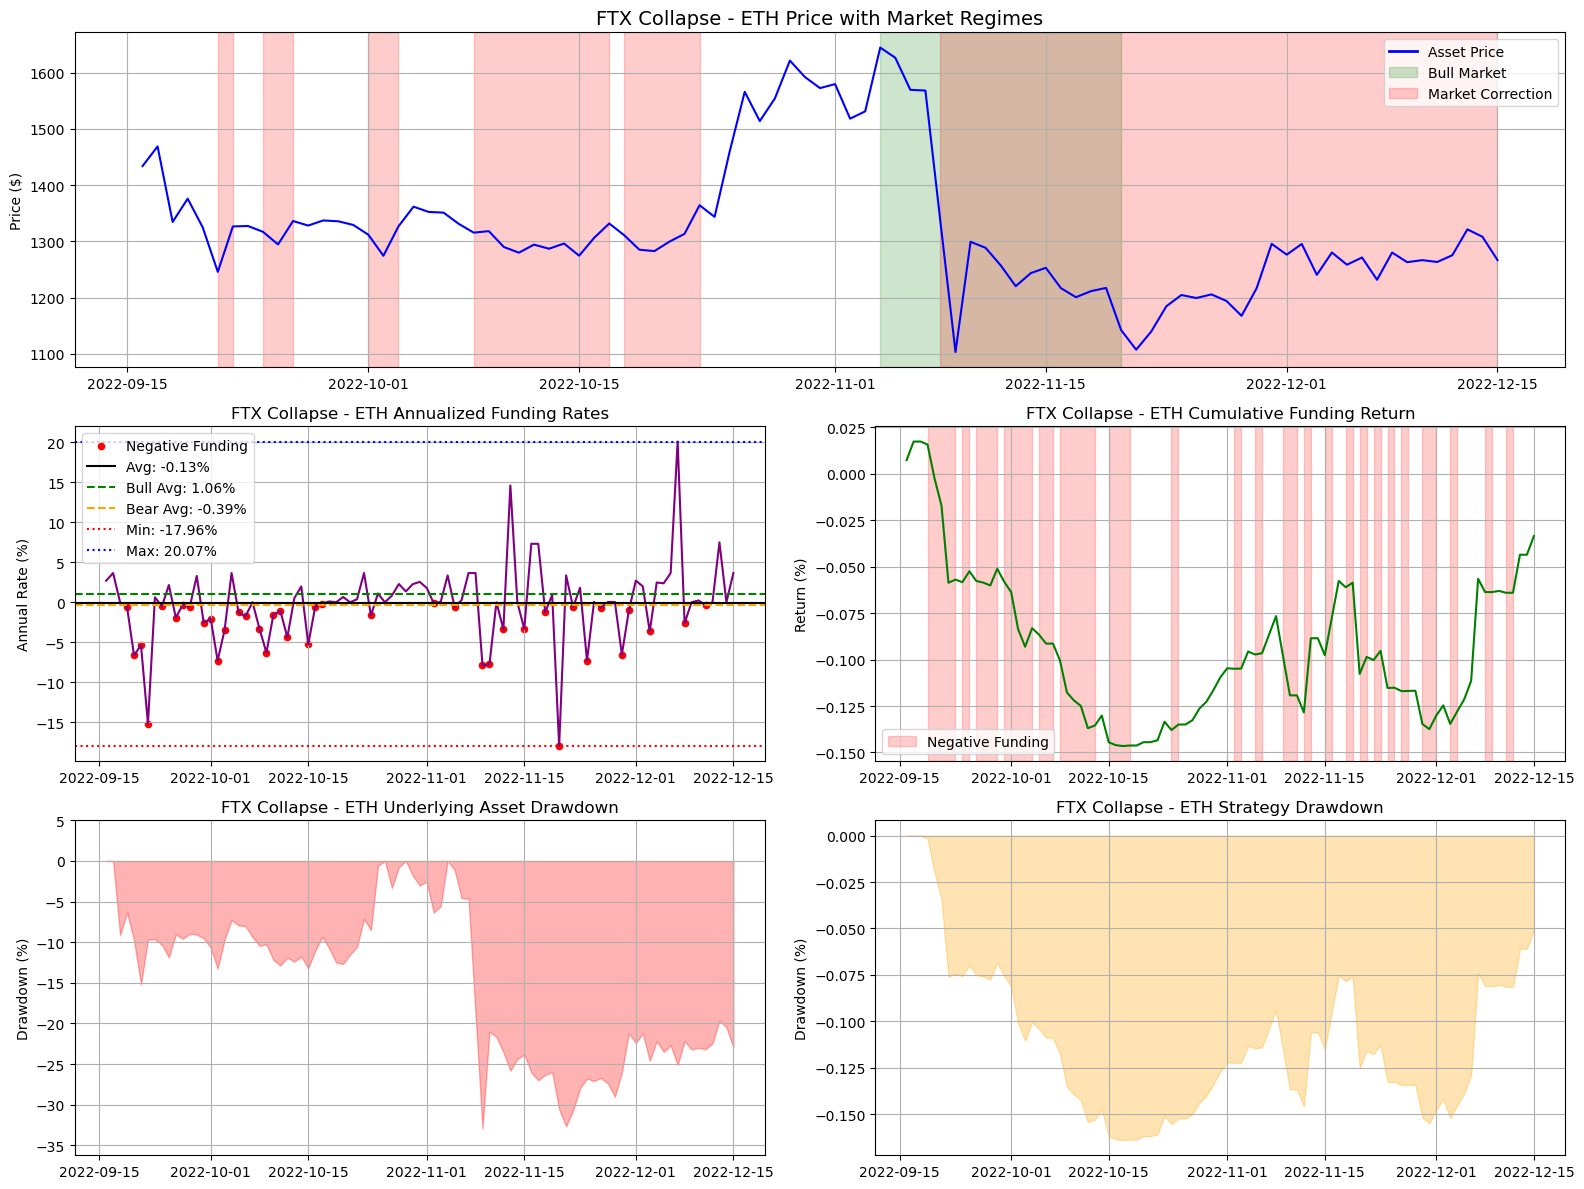

,Metric,BTC Value,ETH Value
0,Period Information,,None
1,Start Date,2022-09-16,2022-09-16
2,End Date,2022-12-15,2022-12-15
3,Total Days,90,90
4,Years,0.2465753424657534,0.2465753424657534
5,Price Information,,None
6,Entry Price,19803.30,1433.90
7,Exit Price,17358.15,1266.74
8,Underlying Asset Performance,,None
9,Total Return,-12.35%,-11.66%


In [13]:
from src.data.get_full_data_coinglass import load_data_for_exchange_pair,display_statistics_table, process_data_files,  compute_funding_performance_multi_exchange, CoinGlassAPI, calculate_performance_metrics,plot_carry_trade_performance,  merge_and_compute_carry_trade, calculate_period_statistics
import matplotlib.pyplot as plt
import pandas as pd



# Example usage
spot_file_path = 'data/concat/spots_data_2022-09-16_to_2022-12-16.csv'
futures_file_path = 'data/concat/futures_data_2022-09-16_to_2022-12-16.csv'

separated_data = process_data_files(spot_file_path, futures_file_path)

# Now you can use the separated data for your delta neutral strategy
# For BTC:
btc_spot_df = separated_data['btc_spot']
btc_futures_df = separated_data['btc_futures']
btc_results_df = merge_and_compute_carry_trade(btc_spot_df, btc_futures_df, merge_on='timestamp')
btc_stats = calculate_period_statistics(btc_results_df)

# For ETH:
eth_spot_df = separated_data['eth_spot']
eth_futures_df = separated_data['eth_futures']
eth_results_df = merge_and_compute_carry_trade(eth_spot_df, eth_futures_df, merge_on='timestamp')
eth_stats = calculate_period_statistics(eth_results_df)


# For BTC analysis:
btc_results_df = merge_and_compute_carry_trade(btc_spot_df, btc_futures_df, merge_on='timestamp')
btc_stats = calculate_period_statistics(btc_results_df)
plot_carry_trade_performance(btc_results_df, btc_stats, title="FTX Collapse - BTC")

# For ETH analysis:
eth_results_df = merge_and_compute_carry_trade(eth_spot_df, eth_futures_df, merge_on='timestamp')
eth_stats = calculate_period_statistics(eth_results_df)
plot_carry_trade_performance(eth_results_df, eth_stats, title="FTX Collapse - ETH")

# Display statistics in a nice table format
# For BTC only:
# btc_table = display_statistics_table(btc_stats)

# For comparison of BTC and ETH:
comparison_table = display_statistics_table(btc_stats, eth_stats)


Post ETF Bull Run (2023-12-10_to_2024-03-10)

Separating spot data...
BTC data saved to src/data/concat/BTC/btc_spot_data_2023-12-10_to_2024-03-09.csv
ETH data saved to src/data/concat/ETH/eth_spot_data_2023-12-10_to_2024-03-09.csv

Separating futures data...
BTC data saved to src/data/concat/BTC/btc_futures_data_2023-12-10_to_2024-03-09.csv
ETH data saved to src/data/concat/ETH/eth_futures_data_2023-12-10_to_2024-03-09.csv

Data separation complete!


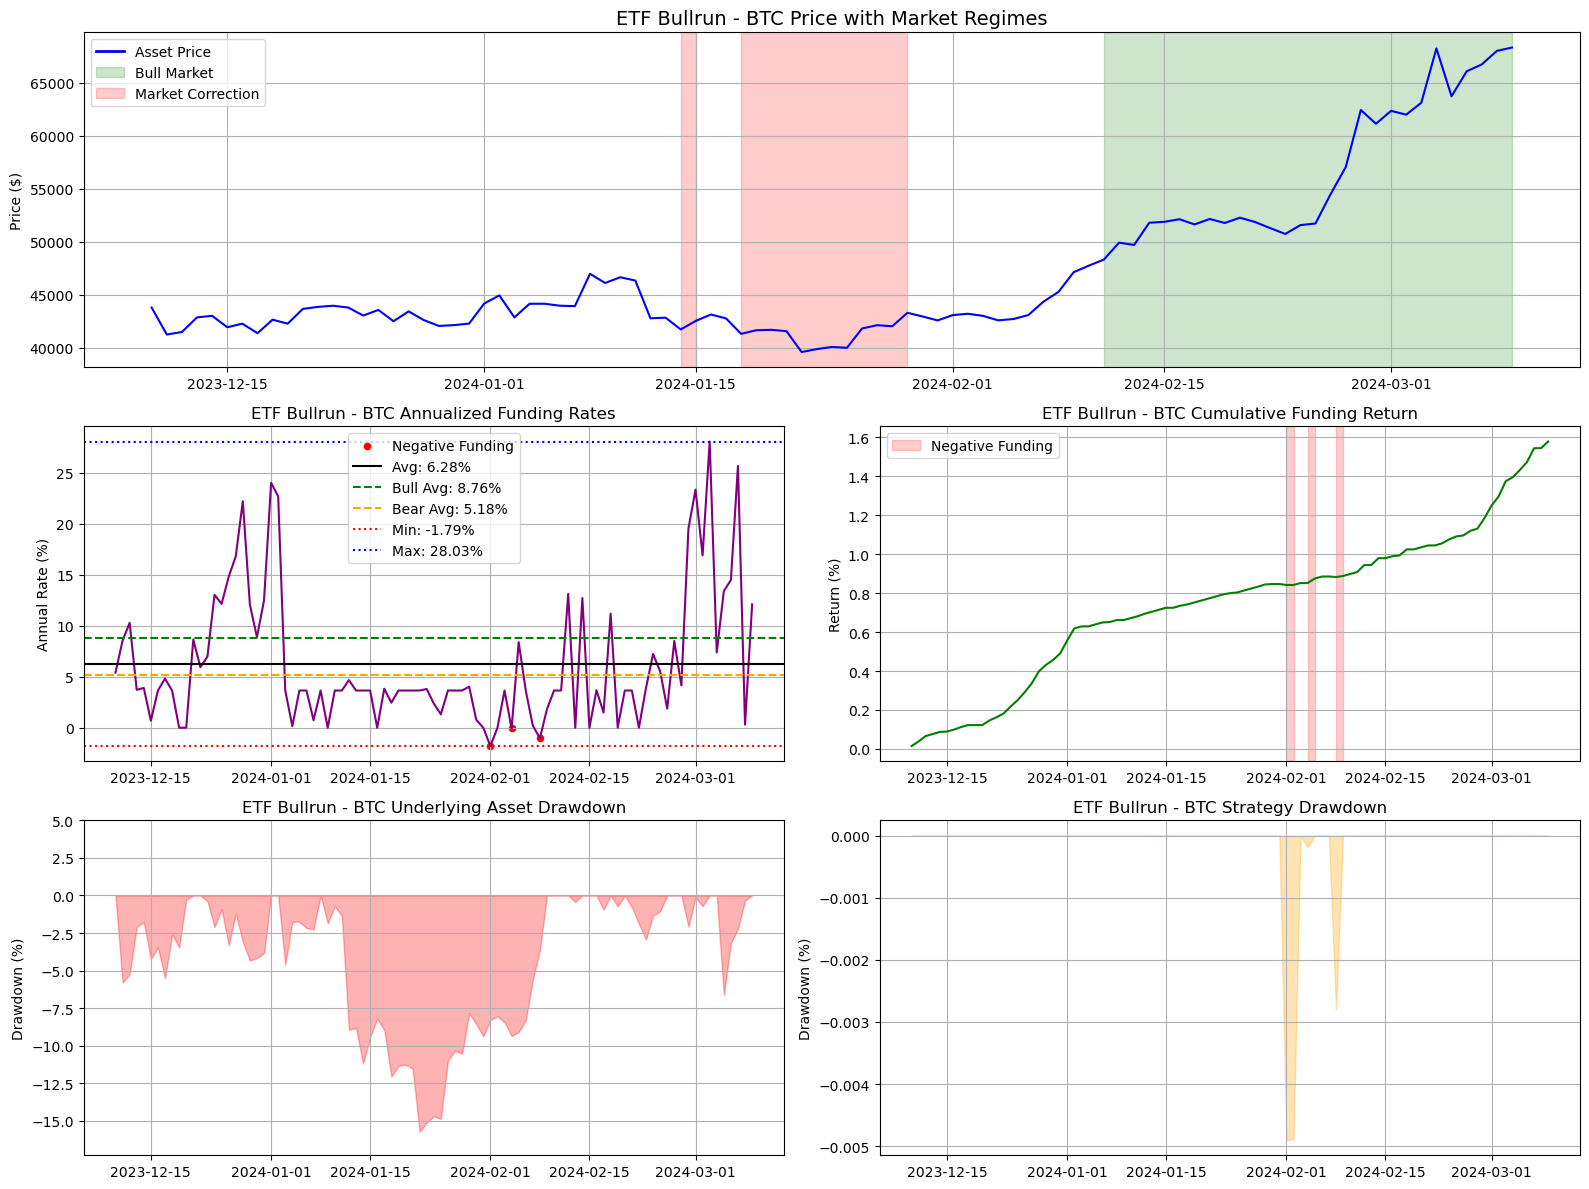

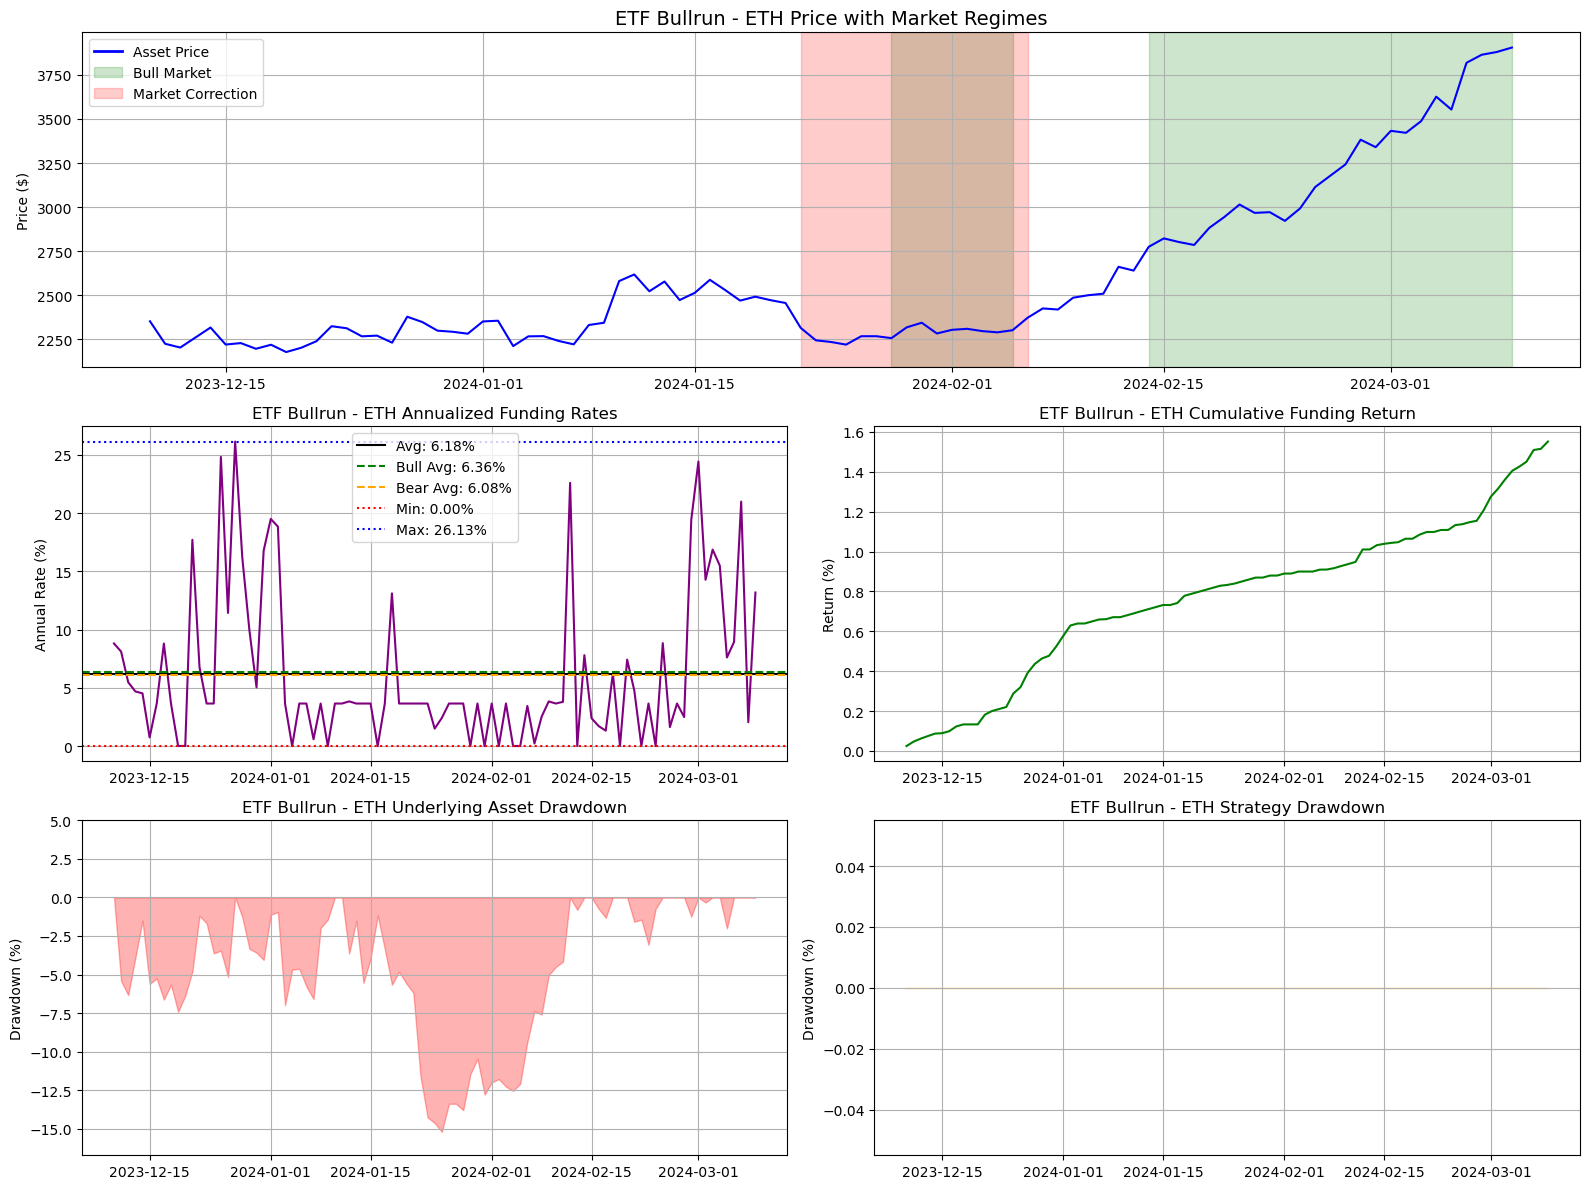

,Metric,BTC Value,ETH Value
0,Period Information,,None
1,Start Date,2023-12-10,2023-12-10
2,End Date,2024-03-09,2024-03-09
3,Total Days,90,90
4,Years,0.2465753424657534,0.2465753424657534
5,Price Information,,None
6,Entry Price,43789.51,2352.39
7,Exit Price,68316.00,3905.00
8,Underlying Asset Performance,,None
9,Total Return,56.01%,66.00%


In [14]:
from src.data.get_full_data_coinglass import load_data_for_exchange_pair,display_statistics_table, process_data_files,  compute_funding_performance_multi_exchange, CoinGlassAPI, calculate_performance_metrics,plot_carry_trade_performance,  merge_and_compute_carry_trade, calculate_period_statistics
import matplotlib.pyplot as plt
import pandas as pd



# Example usage
spot_file_path = 'data/concat/spots_data_2023-12-10_to_2024-03-10.csv'
futures_file_path = 'data/concat/futures_data_2023-12-10_to_2024-03-10.csv'

separated_data = process_data_files(spot_file_path, futures_file_path)

# Now you can use the separated data for your delta neutral strategy
# For BTC:
btc_spot_df = separated_data['btc_spot']
btc_futures_df = separated_data['btc_futures']
btc_results_df = merge_and_compute_carry_trade(btc_spot_df, btc_futures_df, merge_on='timestamp')
btc_stats = calculate_period_statistics(btc_results_df)

# For ETH:
eth_spot_df = separated_data['eth_spot']
eth_futures_df = separated_data['eth_futures']
eth_results_df = merge_and_compute_carry_trade(eth_spot_df, eth_futures_df, merge_on='timestamp')
eth_stats = calculate_period_statistics(eth_results_df)


# For BTC analysis:
btc_results_df = merge_and_compute_carry_trade(btc_spot_df, btc_futures_df, merge_on='timestamp')
btc_stats = calculate_period_statistics(btc_results_df)
plot_carry_trade_performance(btc_results_df, btc_stats, title="ETF Bullrun - BTC")

# For ETH analysis:
eth_results_df = merge_and_compute_carry_trade(eth_spot_df, eth_futures_df, merge_on='timestamp')
eth_stats = calculate_period_statistics(eth_results_df)
plot_carry_trade_performance(eth_results_df, eth_stats, title="ETF Bullrun - ETH")

# Display statistics in a nice table format
# For BTC only:
# btc_table = display_statistics_table(btc_stats)

# For comparison of BTC and ETH:
comparison_table = display_statistics_table(btc_stats, eth_stats)
